In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser


In [2]:
dataset = pd.read_csv('appdata10.csv')

In [3]:
len(dataset)

50000

In [4]:
dataset.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
dataset['hour'] = dataset.hour.str.slice(1, 3).astype(int)

In [7]:
dataset.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [8]:
dataset2 = dataset.copy().drop(['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'], axis=1)

In [9]:
dataset2.head(4)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0


### Histogram

In [10]:
plt.suptitle('Histograms of Numerical Columns', fontsize=20)

Text(0.5, 0.98, 'Histograms of Numerical Columns')

<Figure size 432x288 with 0 Axes>

In [11]:
plt.rcParams["figure.figsize"] = (13,9)

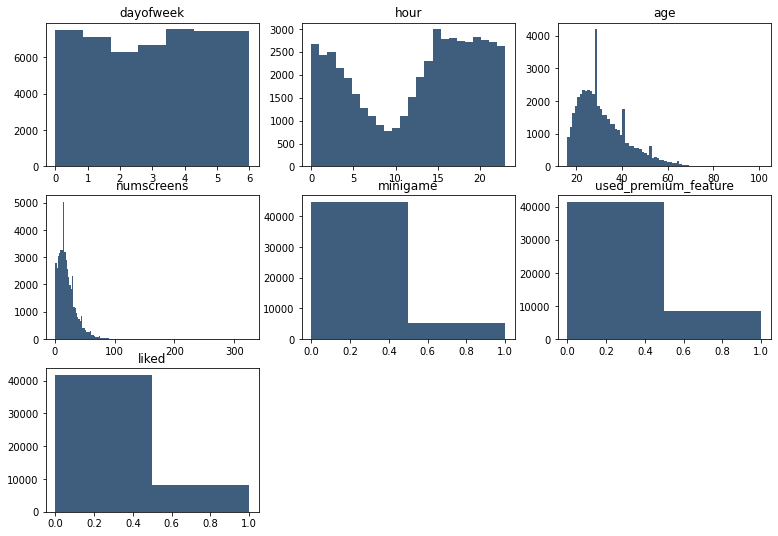

In [12]:
for i in range(1, dataset2.shape[1]+1):
  plt.subplot(3,3,i)
  f = plt.gca()
  f.set_title(dataset2.columns.values[i-1])

  vals = np.size(dataset2.iloc[:, i-1].unique())

  plt.hist(dataset2.iloc[:, i-1], bins = vals, color='#3F5D7D')

### Correlation with Response

In [13]:
dataset2.corrwith(dataset['enrolled'])

dayofweek               0.011326
hour                   -0.066694
age                    -0.131303
numscreens              0.209457
minigame                0.104979
used_premium_feature   -0.052703
liked                  -0.007022
dtype: float64

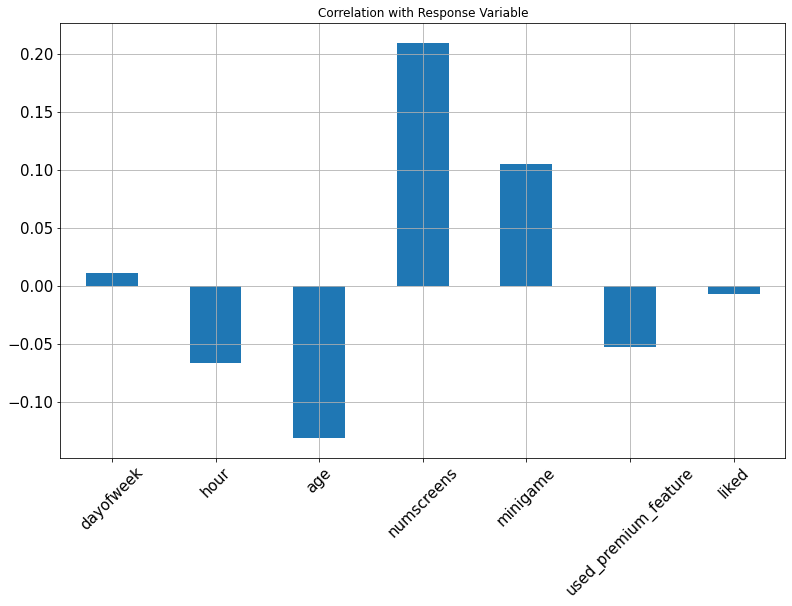

In [14]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(13,8),
                                             title = 'Correlation with Response Variable',
                                             fontsize = 15, rot = 45,
                                             grid = True)

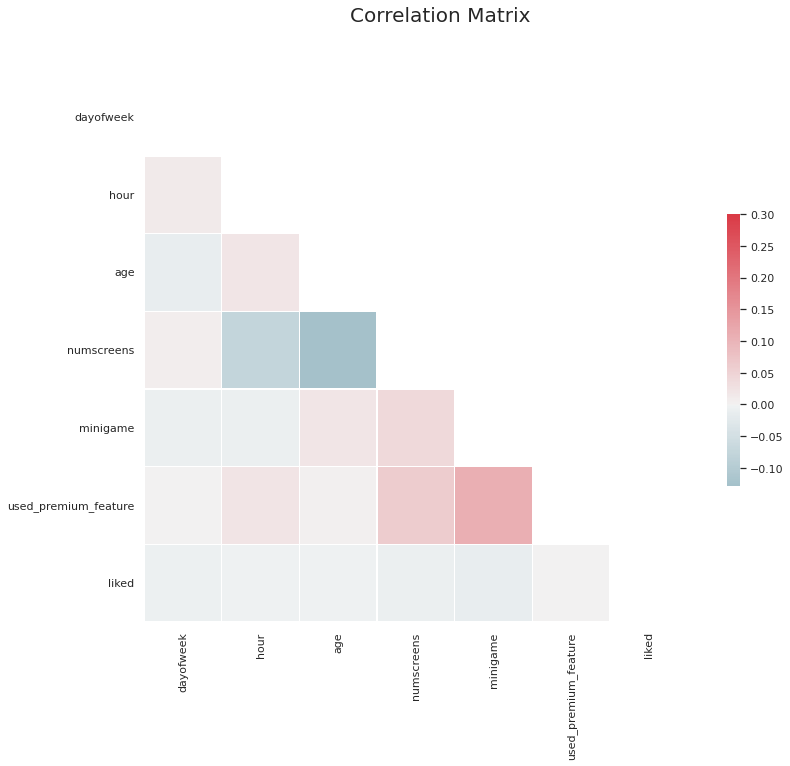

In [15]:
sn.set(style='white', font_scale=1)

corr = dataset2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(14,10))
f.suptitle("Correlation Matrix", fontsize =20)

cmap = sn.diverging_palette(220, 10, as_cmap=True)

sn.heatmap(corr, mask=mask, cmap=cmap, vmax = .3, center = 0,
           square=True, linewidth=.5, cbar_kws={"shrink":.5})

In [16]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [17]:
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]
dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset['enrolled_date']]

In [18]:
dataset.head(2)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0


In [19]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [20]:
dataset['difference'] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

In [21]:
dataset.head(2)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN


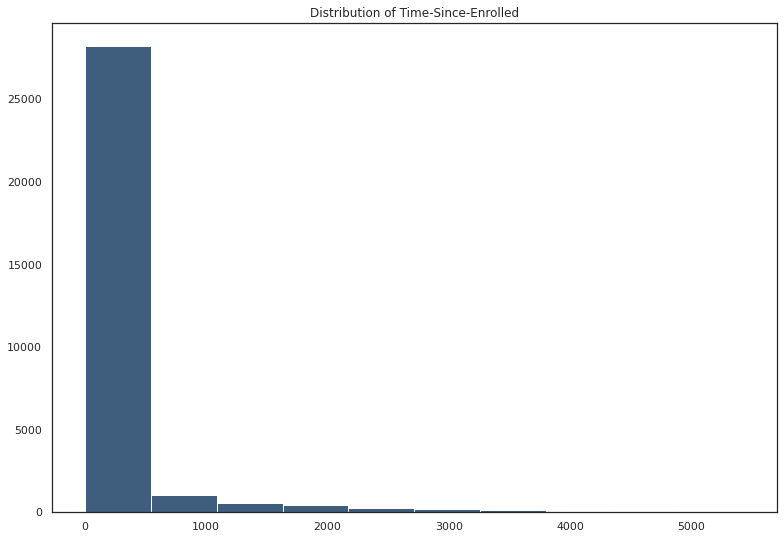

In [22]:
plt.hist(dataset["difference"].dropna(), color = '#3F5D7D')
plt.title("Distribution of Time-Since-Enrolled")
plt.show()

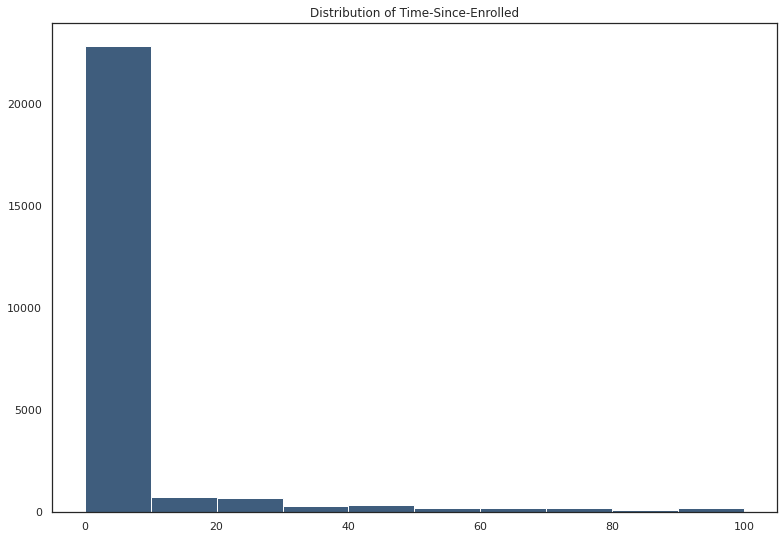

In [23]:
plt.hist(dataset["difference"].dropna(), color = '#3F5D7D', range = [0, 100])
plt.title("Distribution of Time-Since-Enrolled")
plt.show()

In [24]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

In [27]:
dataset.drop(['difference', 'enrolled_date', 'first_open'], axis=1, inplace=True)

### Formatting the screen_list Field

In [28]:
top_screens = pd.read_csv('top_screens.csv')

In [29]:
top_screens.head(2)

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location


In [30]:
top_screens = top_screens.top_screens.values

In [31]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','

In [33]:
for sc in top_screens:
  dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
  dataset["screen_list"] = dataset.screen_list.str.replace(sc+',', '')

In [34]:
dataset.head(1)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
dataset['Other'] = dataset.screen_list.str.count(',')
dataset = dataset.drop('screen_list', axis=1)

### Funnels
- Group of screens that belongs to same set

In [37]:
savings_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10']

dataset['SavingsCount'] = dataset[savings_screens].sum(axis=1)
dataset.drop(savings_screens, axis=1, inplace=True)

In [38]:
cm_screens = ['Credit1',
              'Credit2',
              'Credit3',
              'Credit3Container',
              'Credit3Dashboard']

dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset.drop(cm_screens, axis=1, inplace=True)

In [39]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3']
  
dataset['CCCount'] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

In [41]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'screen_list', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'liked', 'Loan2',
       'location', 'Institutions', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Loan3', 'Splash', 'Loan', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker',
       'SavingsCount', 'CMCount', 'CCCount'],
      dtype='object')

In [42]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4']

dataset['LoansCount'] = dataset[loan_screens].sum(axis=1)
dataset.drop(loan_screens, axis=1, inplace=True)

In [43]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'screen_list', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'liked', 'location',
       'Institutions', 'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen', 'Splash',
       'RewardsContainer', 'EditProfile', 'Finances', 'Alerts', 'Leaderboard',
       'VerifyMobile', 'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'SavingsCount',
       'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [46]:
dataset.to_csv('new_appdata10_1.csv', index=False)